https://www.kaggle.com/c/microsoft-malware-prediction/discussion/75834

If I am a hacker, and I want to attack window's machine. what I will do?

I will try to find leaks of some popular software, if one software has many users, then if I attack successfully and I will get many profits(But usually this software has better defense).(This is why some count features are so important).

I will try to attack some machines that do not have many defenses(especially new software, like is it touch or not？ New products usually have worse defense than old ones since old ones have improved their defenses for a long time. So I will have many chances for new products), (This is why some boolean features are so important.)

That's how I understand this problem. All comments are welcome.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
with open('train.pkl', 'rb') as l:
    train = pickle.load(l)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
train.columns

Index(['AppVersion', 'AvSigVersion', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'CountryIdentifier', 'CityIdentifier',
       'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'IsProtected', 'SmartScreen', 'Census_MDC2FormFactor',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM',
       'Census_ChassisTypeName',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_PowerPlatformRoleName', 'Census_InternalBatteryType',
       'Census_InternalBatteryNumberOfCharges', 'Census_OSVersion',
       'Census_O

In [8]:
for c in train.columns:
    print(c, len(train[c].unique()), train[c].unique(), '\n')

AppVersion 107 [ 59  26 105  53  61  20  39  13  97   4  30  14  68  46  17  78  94   0
  25  92  38  16   6  91  88  23  76   1  71 101   2  28 103  99  98   5
  93  27  22 102 100 104  73  85  75  11  84  70  74   8  58  31  86  37
  81  67  48  55  90  65   7  77  83  72  12  87   9  45  82  96  54  40
  60   3  66  51  64  62  80  10  47  18  44  49  41  63  50  95  35  24
  42  56  43  21  57  79  36 106  89  34  15  69  52  29  19  33  32] 

AvSigVersion 8488 [7757 6260 7628 ...  107   61  144] 

AVProductStatesIdentifier 26459 [53447. 43927. 47238. ... 16684. 60602. 31745.] 

AVProductsInstalled 7 [1. 2. 3. 5. 4. 6. 7.] 

CountryIdentifier 222 [ 29  93  86  88  18  97  78 164 107  80 171 169 157 178 158 147  12 203
  43 205 199   9  68 141  35 159 160 129  44 207  15 201  89   3 195 148
 100  16 155  53 204  94   8 152 110 184 132 214 122  57  39  59  70  52
 149  41   2 179 180 167 101 220 119 173  84 166  55  60  56  51 150  99
  66  24  19  91 108  81 142  50 162  21  95 154 

Census_TotalPhysicalRAM 1758 [ 4096.  6144.  8192. ...  9343. 16061.  7627.] 

Census_ChassisTypeName 46 [19 32 30 35 20 25 13 38 33 23 44 26 18 43 45 28 41 29 42 27  4 39 16 36
  8  7 24 37 31  0 14  5 22 40 34  6  3  1 11 21 10 15  2 12 17  9] 

Census_InternalPrimaryDiagonalDisplaySizeInInches 755 [ 18.90625     13.8984375   21.5         18.5         14.
  17.203125    15.5         15.6015625   11.8984375   17.09375
  13.296875    13.203125    24.          17.703125    23.
  20.703125    27.          40.          21.703125    17.296875
  11.6015625   15.296875    20.          32.          19.09375
  10.796875    12.203125    19.          12.296875    17.
  23.796875    12.          23.40625     36.09375     14.1015625
  37.          25.          12.8984375   20.40625     27.90625
  12.5         16.703125    23.5         15.3984375   31.5
  28.796875     8.1015625   12.1015625   10.          24.5
  16.203125     8.8984375   10.3984375   22.           6.8984375
  34.09375     19.5    

Census_InternalPrimaryDisplayResolutionHorizontal 1582 [1440. 1366. 1920. ... 2960. 1905. 1566.] 

Census_PowerPlatformRoleName 9 [1 3 6 8 5 0 7 2 4] 

Census_InternalBatteryType 72 [67 48 42  3 49 45 41 65 39 23 57 62  2 37 30 34 22 51 50 10 64 52 19 21
 20 69 24 11 26 17 71 25 47 43 70  6 58 33 46  9 60 28 13 36 44 38  5 61
 66 59 29 16  7 35 32 53 12 55  1 63 18 14  8 27 68 40  0 15  4 31 54 56] 

Census_InternalBatteryNumberOfCharges 38615 [4.2949673e+09 1.0000000e+00 0.0000000e+00 ... 2.7736000e+04 2.6424000e+04
 1.6807000e+04] 

Census_OSVersion 428 [337 333 341 339 129 342 338  74 345 295 336 284 335 285 182 234 309 300
 260  87 231 141 298 159 238 243 224   0 299 306 346  40 253  67 176  82
 221   8 178 246  61  69 133 257 350 144 152 305 348 222 304 150 262 289
 250 255 160  76  53 293  38  85 232 264  56 154 296 312 136   9 307  32
 229  22 177 186 151 308 294 146 149  98 259 153 251 261  79 265 134 310
 301  65 189  89 171 100 254  88 316 388 311 236  93  90 292  94 181 252


Census_FirmwareVersionIdentifier 46809 [36144. 57858. 52682. ...  3871. 33818. 69704.] 

Census_IsSecureBootEnabled 2 [0 1] 

Census_IsTouchEnabled 2 [0 1] 

Census_IsAlwaysOnAlwaysConnectedCapable 2 [0. 1.] 

Wdft_IsGamer 2 [0. 1.] 

Wdft_RegionIdentifier 15 [10.  8.  3.  1. 15. 11.  2.  7. 12.  4. 13.  9.  6.  5. 14.] 

HasDetections 2 [0 1] 



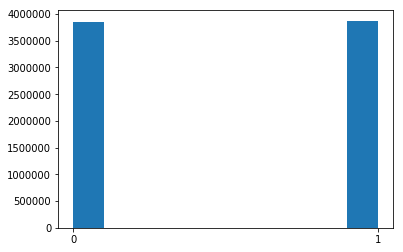

In [32]:
import matplotlib.pyplot as plt
plt.hist(train[['HasDetections']])
plt.show()

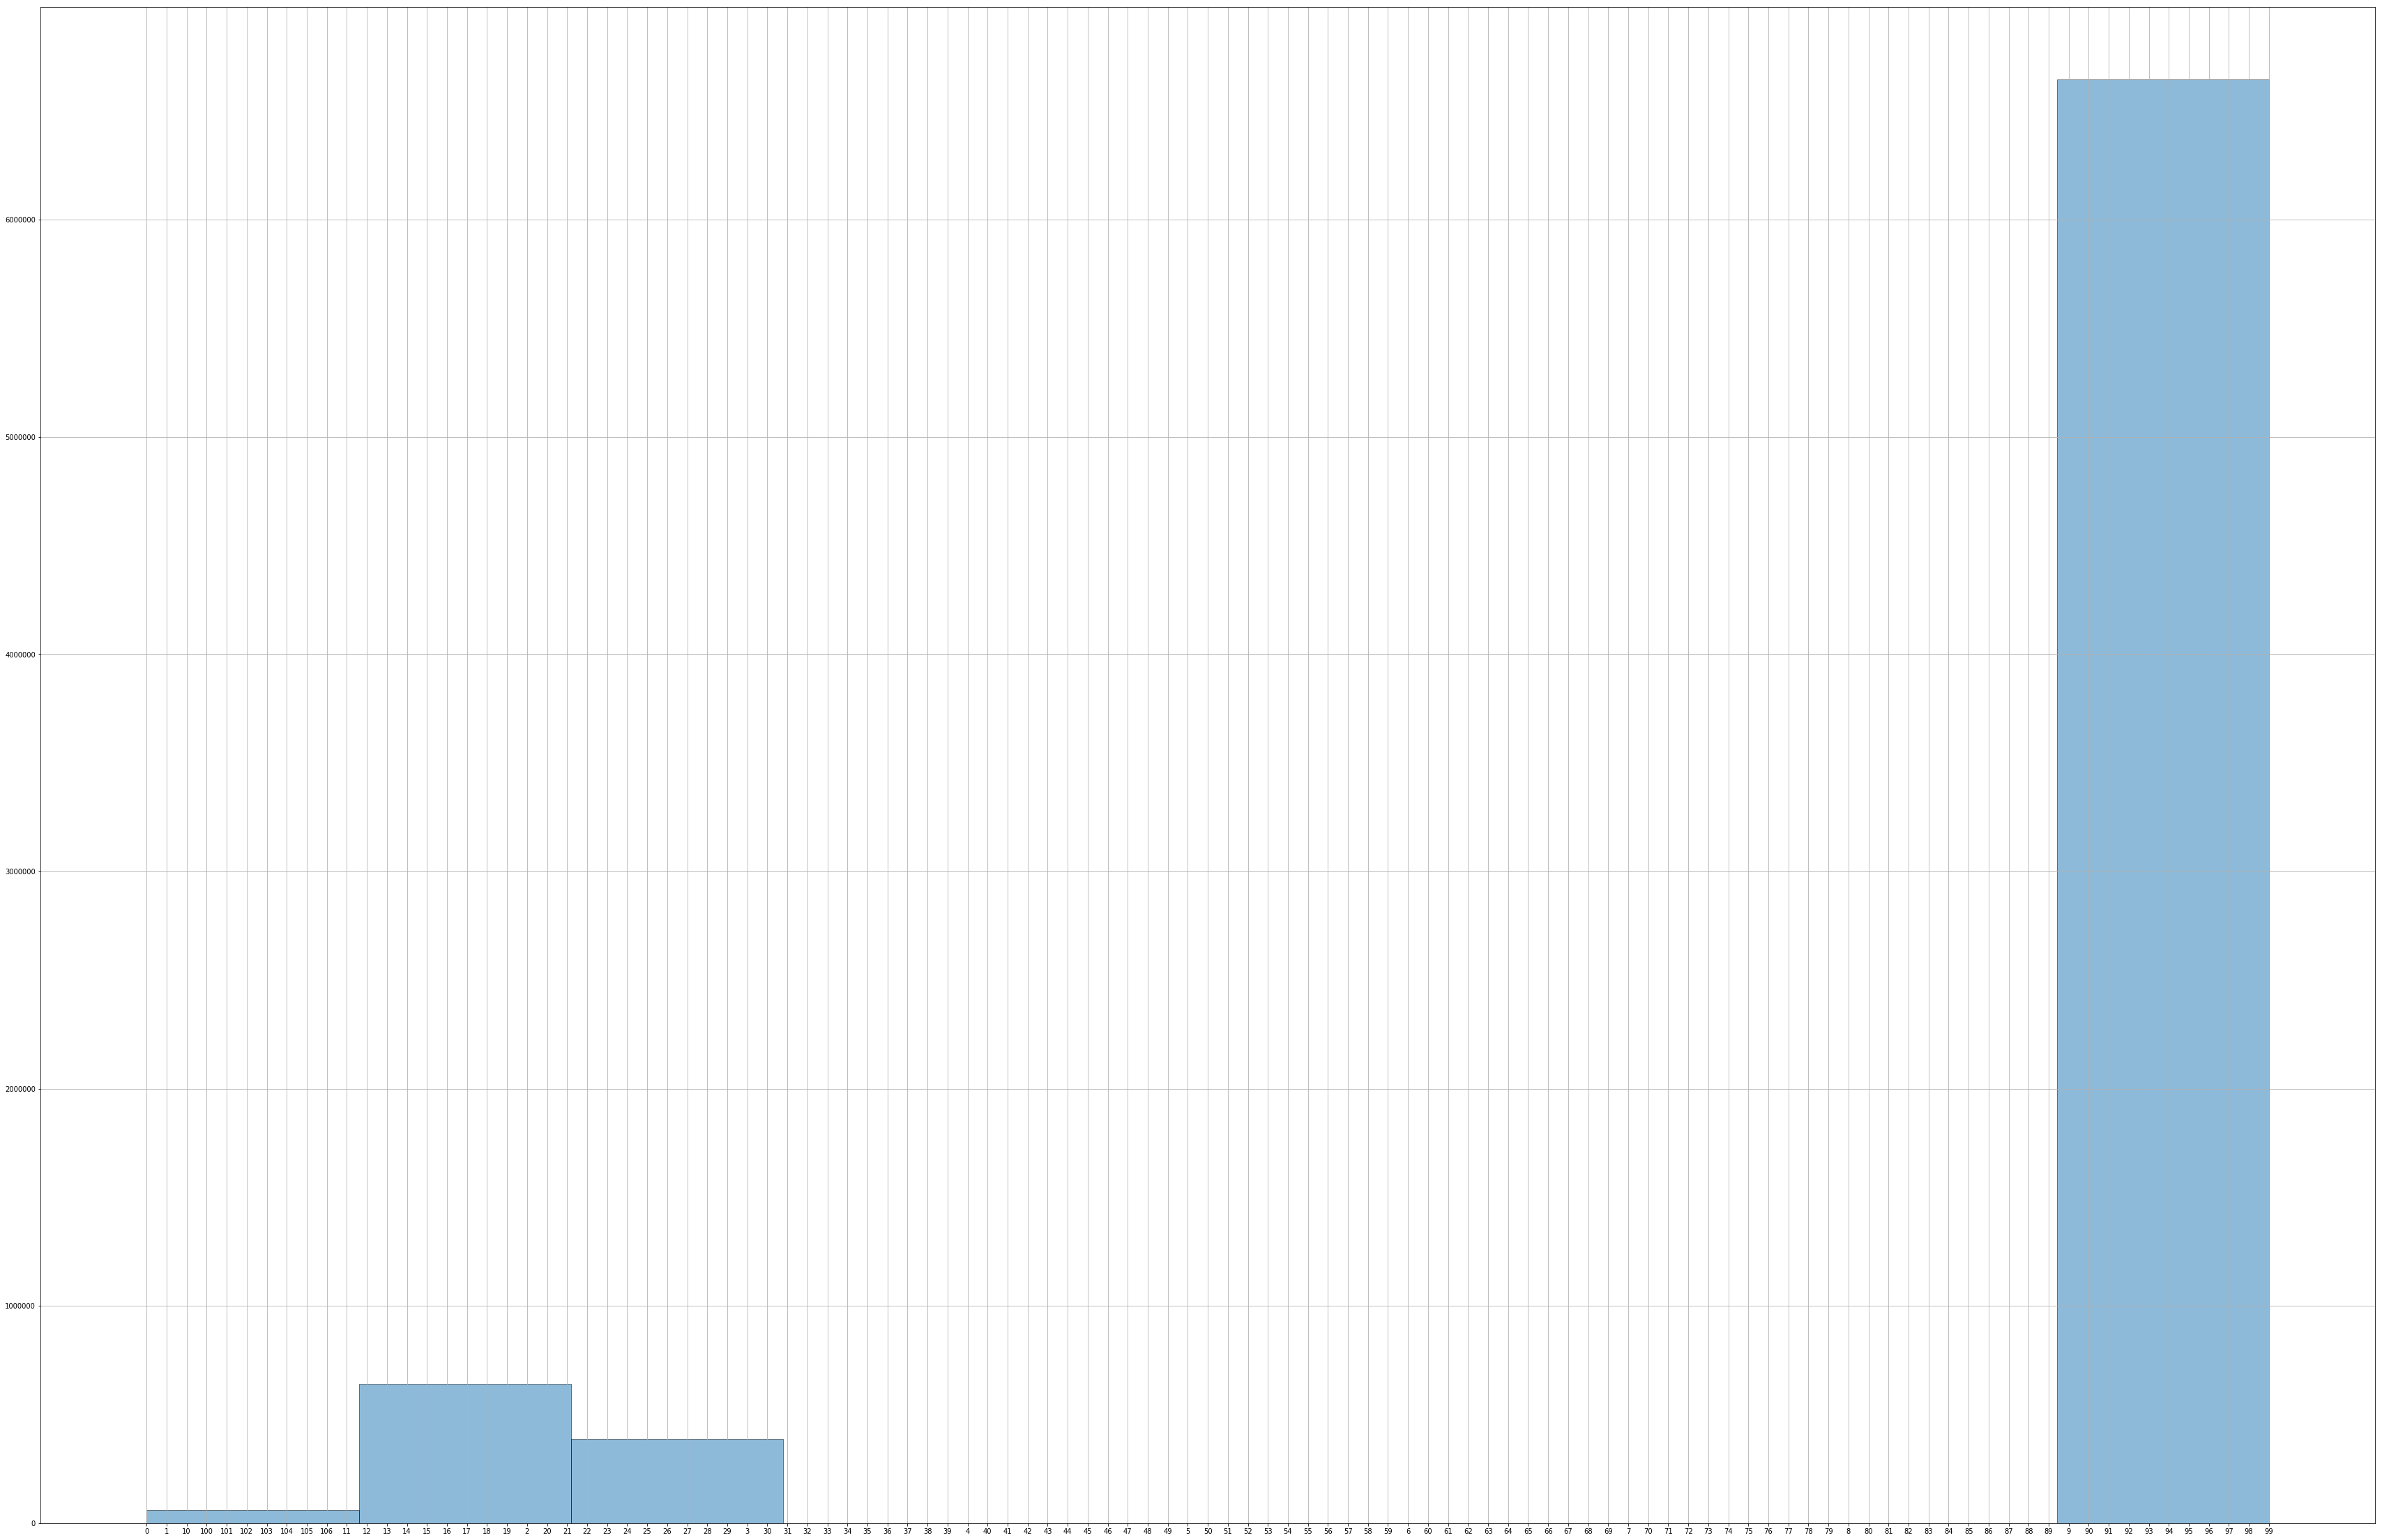

In [61]:
plt.figure(figsize=(60, 40))
plt.hist(train[['AppVersion']], alpha=0.5, histtype='bar', ec='black')
plt.grid(True)
plt.show()

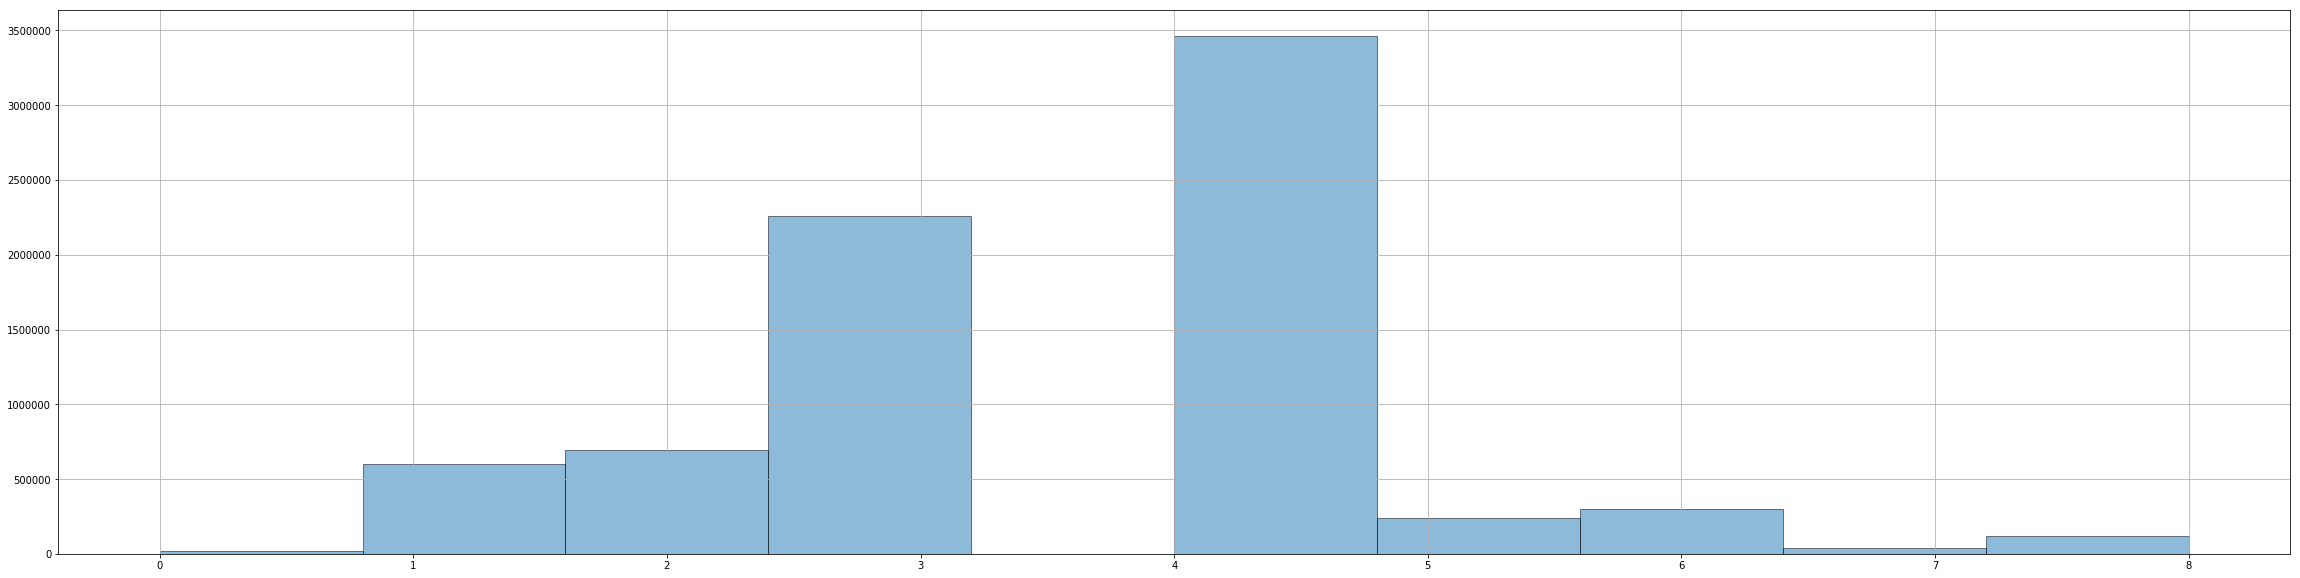

In [58]:
plt.figure(figsize=(40, 10))
plt.hist(train[['OsPlatformSubRelease']], alpha=0.5, histtype='bar', ec='black')
plt.grid(True)
plt.show()

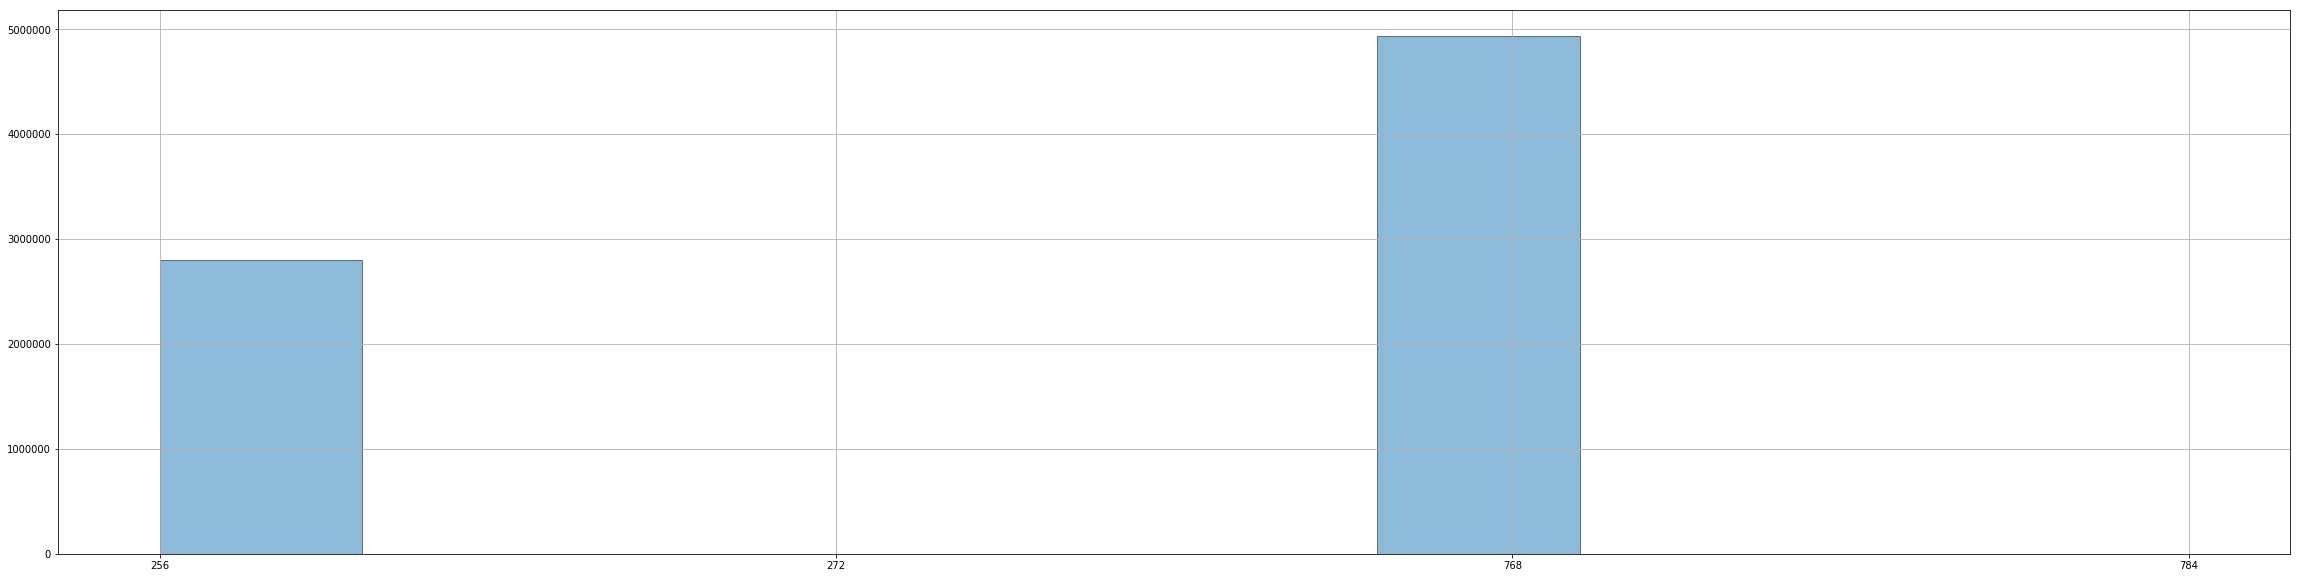

In [62]:
plt.figure(figsize=(40, 10))
plt.hist(train[['OsSuite']], alpha=0.5, histtype='bar', ec='black')
plt.grid(True)
plt.show()

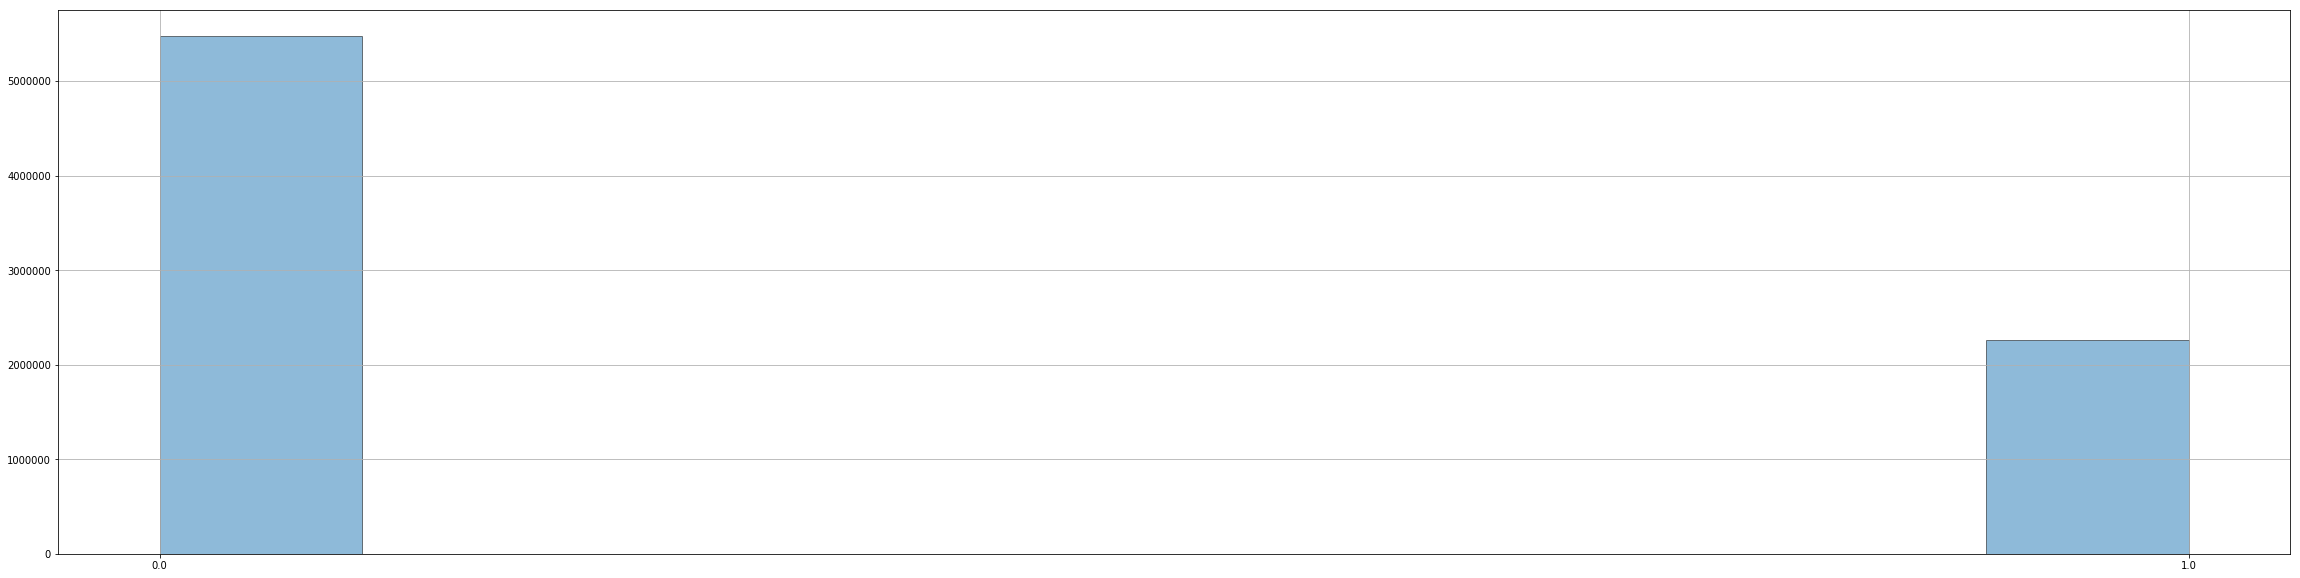

In [63]:
plt.figure(figsize=(40, 10))
plt.hist(train[['Wdft_IsGamer']], alpha=0.5, histtype='bar', ec='black')
plt.grid(True)
plt.show()